## Automated Code

In [1]:
import os
import numpy as np
import pandas as pd
path_to_json = r'C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien/'

folders = [pos_json for pos_json in os.listdir(path_to_json) ]
print(folders)  # for me this prints ['foo.json']

['521346721226711040', '521360486387175424']


In [2]:
#folders[0]
import json
import csv

In [3]:
base = r'C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien'

In [4]:
# to display full text
pd.set_option('display.max_colwidth', -1)

## Extract features from json and write to csv file on disk

In [5]:
for folder in folders:
    counter = 0
    data = []
    within_tweetid = os.path.join(base, folder)
    print(within_tweetid)
    json_files = [pos for pos in os.listdir(within_tweetid) if pos.endswith('.json')]
    #print(json_files)
    for jsons in json_files:
        if jsons == 'annotation.json':
            path = os.path.join(within_tweetid, json_files[0])
            with open(path,'r') as f:
                annot_json = json.load(f)
            annotations_df = pd.DataFrame(annot_json)
            #print(annotations_df)
            annotations_df_slice = pd.DataFrame(annotations_df['is_rumour'])
            annot = annotations_df_slice.iloc[0,:]
            annot = annot.reset_index()
            annot.drop("index", axis = 1, inplace = True)
            s = list(str(annot).split())
                    #data = ",".join(map(str, retweet_df))
            for i in s:
                data.append(i)
                    
            #data.append(annotations_df_slice.iloc[0])
    
        '''elif jsons == 'retweets.json':
            
            retweets = []
            path = os.path.join(within_tweetid, json_files[1])
            for line in open(path, 'r'):
                retweets.append(json.loads(line))
                for retweet in retweets:
                    retweet_df = pd.DataFrame(retweet)
                    retweet['user']['friends_count']
                    retweet_df['verified'] = retweet_df.loc['verified']['user']
                    retweet_df['friends_count'] = retweet_df.loc['friends_count']['user']
                    retweet_df['favourites_count'] = retweet_df.loc['favourites_count']['user']
                    retweet_df['location'] = retweet_df.loc['location']['user']
                    retweet_df['followers_count'] = retweet_df.loc['followers_count']['user']
                    #retweet_df = retweet_df[['text','id','retweet_count','verified','followers_count','favourites_count','friends_count','location']]
                    retweet_df = retweet_df['text']
                    retweet_df = retweet_df.reset_index()
                    retweet_df.drop(['index'], axis = 1, inplace = True)
                    retweet_df = retweet_df.iloc[0,:]
                    retweet_df = retweet_df.reset_index()
                    retweet_df.drop("index", axis = 1, inplace = True)
                    #s = list(str(retweet_df).split())
                    #data = ",".join(map(str, retweet_df))
                    #for i in s:
                     #   data.append(i)
                    data.append(retweet_df)'''
                    #print (data)
    
            
    inner_folders = [pos for pos in os.listdir(within_tweetid)]
    #print(inner_folders)
    for inner in inner_folders:
        if inner == 'source-tweets':
            
            within_source_tweets = os.path.join(within_tweetid, inner)
            json_files = [pos for pos in os.listdir(within_source_tweets) if pos.endswith('.json')]
            for json_file in json_files:
                path = os.path.join(within_source_tweets, json_file)
                print(path)
                with open(path,'r') as f:
                    src_json = json.load(f)
                src_df = pd.DataFrame(src_json)
                '''src_json['user']['friends_count']
                src_df['verified'] = src_df.loc['verified']['user']
                src_df['friends_count'] = src_df.loc['friends_count']['user']
                src_df['favourites_count'] = src_df.loc['favourites_count']['user']
                src_df['location'] = src_df.loc['location']['user']
                src_df['followers_count'] = src_df.loc['followers_count']['user']'''
                #src_df = src_df[['text','id','retweet_count','verified','followers_count','favourites_count','friends_count','location']]
                src_df = src_df['text']
                src_df = src_df.reset_index()
                src_df.drop(['index'], axis = 1, inplace = True)
                src_df = src_df.iloc[0,:]
                src_df = src_df.reset_index()
                src_df.drop("index", axis = 1, inplace = True)
                #s = list(str(src_df).split())
                #for i in s:
                 #   data.append(i)
                    
                data.append(src_df.iloc[:1,:])
    
            #print(json_files)
            
        '''elif inner == 'reactions':
             
             within_reactions_tweets = os.path.join(within_tweetid, inner)
             json_files = [pos for pos in os.listdir(within_reactions_tweets) if pos.endswith('.json')]
             #print(json_files)
             for json_file in json_files:
                path = os.path.join(within_reactions_tweets, json_file)
                with open(path,'r') as f:
                    reactions_json = json.load(f)
                reactions = pd.DataFrame(reactions_json)
                reactions_json['user']['friends_count']
                reactions['verified'] = reactions.loc['verified']['user']
                reactions['friends_count'] = reactions.loc['friends_count']['user']
                reactions['favourites_count'] = reactions.loc['favourites_count']['user']
                reactions['location'] = reactions.loc['location']['user']
                reactions['followers_count'] = reactions.loc['followers_count']['user']
                #reactions = reactions[['text','id','retweet_count','verified','followers_count','favourites_count','friends_count','location']]
                reactions = reactions['text']
                reactions = reactions.reset_index()
                reactions.drop(['index'], axis = 1, inplace = True)
                reactions = reactions.iloc[0,:]
                reactions = reactions.reset_index()
                reactions.drop("index", axis = 1, inplace = True)
                #s = list(str(reactions).split())
                #for i in s:
                 #   data.append(i)
                
                data.append(reactions.iloc[:1,:])'''
    if counter == 0:
        with open(r'C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\dump_ebola_feature.csv', 'a', encoding = 'utf-8') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(data)
        csvFile.close()
    else:
        with open(r'C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\dump_ebola_feature.csv', 'a', newline = '',encoding = 'utf-8') as csvFile:
            writer = csv.writer(csvFile)
            writer.writerow(data)
        csvFile.close()
    counter = counter + 1
    
    import gc
    gc.collect()
    
print(within_tweetid)

C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien\521346721226711040
C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien\521346721226711040\source-tweets\521346721226711040.json
C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien\521360486387175424
C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien\521360486387175424\source-tweets\521360486387175424.json
C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\ebola-essien\521360486387175424


## Load csv file where data is written

In [12]:
df = pd.read_csv(r'C:\Users\shakshi\Desktop\phemerumourschemedataset\pheme-rumour-scheme-dataset\threads\en\dump_ebola_feature.csv', encoding = 'utf-8')

In [13]:
df.head()

,label,text
0,rumour,Unconfirmed reports claim that Michael Essien has contracted Ebola. http://t.co/VASQrZdLhH
1,NaN,NaN
2,rumour,AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times] http://t.co/r6y8d9HMAw


In [14]:
df = df.iloc[[0,2],:]

In [15]:
df

,label,text
0,rumour,Unconfirmed reports claim that Michael Essien has contracted Ebola. http://t.co/VASQrZdLhH
2,rumour,AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times] http://t.co/r6y8d9HMAw


In [37]:
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [38]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [39]:
token = Tokenizer()

In [40]:
#tweets = X_train + X_test

In [41]:
#token.fit_on_texts(tweets)

In [42]:
max_len = max([len(tweet.split()) for tweet in tweets])

In [31]:
#vocab = len(token.word_index) + 1

In [32]:
#X_train_token = token.texts_to_sequences(X_train)
#X_test_token = token.texts_to_sequences(X_test)
#X_train_p = pad_sequences(X_train_token, maxlen = max_len, padding = 'post')
#X_test_p = pad_sequences(X_test_token, maxlen = max_len, padding = 'post')

## NLP stuff

In [19]:
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
text = list()
line = df['text'].values.tolist()
for l in line:
    token = word_tokenize(l)
    token = [t.lower() for t in token]
    punct = str.maketrans('','',string.punctuation)
    translate = [t.translate(punct) for t in token]
    words = [word for word in translate if word.isalpha()]
    stop = set(stopwords.words('english'))
    words = [t for t in words if not t in stop]
    text.append(words)

In [20]:
len(text)

2

In [21]:
text

[['unconfirmed',
  'reports',
  'claim',
  'michael',
  'essien',
  'contracted',
  'ebola',
  'http',
  'tcovasqrzdlhh'],
 ['ac',
  'milan',
  'midfielder',
  'michael',
  'essien',
  'diagnosed',
  'ebola',
  'get',
  'well',
  'soon',
  'michael',
  'daily',
  'times',
  'http']]

## Word Embeddings using gensim

In [22]:
import gensim

In [23]:
model = gensim.models.Word2Vec(sentences = text, size = 100, window = 2, workers = 3, min_count = 1)

In [24]:
words = list(model.wv.vocab)
print('Vocab size', len(words))

Vocab size 18


In [72]:
words

['unconfirmed',
 'reports',
 'claim',
 'michael',
 'essien',
 'contracted',
 'ebola',
 'http',
 'tcovasqrzdlhh',
 'ac',
 'milan',
 'midfielder',
 'diagnosed',
 'get',
 'well',
 'soon',
 'daily',
 'times']

## Most Similar Words

In [25]:
model.wv.most_similar('daily')

[('milan', 0.2648314833641052),
 ('midfielder', 0.11276337504386902),
 ('soon', 0.110157310962677),
 ('claim', 0.10047351568937302),
 ('well', 0.08471009880304337),
 ('essien', 0.07918926328420639),
 ('diagnosed', 0.04718385264277458),
 ('unconfirmed', 0.04239392280578613),
 ('ebola', 0.03168824687600136),
 ('tcovasqrzdlhh', 0.01942703127861023)]

## Save vectors

In [26]:
file = 'twitter_rumour_detection.txt'

In [27]:
model.wv.save_word2vec_format(file,binary = False)

C:\ProgramData\Anaconda3\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [28]:
import os
emb = {}
f = open(os.path.join('', 'twitter_rumour_detection.txt'), encoding = 'utf-8')
for line in f:
    values = line.split()
    word = values[0]
    value = np.asarray(values[1:])
    emb[word] = value
f.close()

In [65]:
emb['well']

array(['-0.0036656035', '-0.0034933717', '0.0027291046', '0.0029694631',
       '0.0006821127', '-0.0043849368', '-0.001904691', '-0.000556154',
       '-0.0010438744', '0.00046008776', '-0.0024303119', '-0.0026369696',
       '0.0032461344', '-0.0016403194', '-0.0031485362', '0.0006363612',
       '-0.003169945', '-0.0033661874', '-0.0019860577', '0.0025595203',
       '-0.0017074316', '0.0011097589', '-0.0022978699', '-0.0005399402',
       '-0.003990801', '0.004013372', '0.0040589618', '-0.0037553948',
       '0.0013157821', '-0.00348445', '0.0025532125', '-0.0034674297',
       '-0.00471611', '-0.002833595', '0.0033768222', '-0.00075920235',
       '-0.0014081079', '-0.0015646215', '0.0028387476', '-0.004411316',
       '-0.004718894', '-0.00048095922', '-0.0017334935', '-0.00422342',
       '-0.003252598', '0.0029053865', '-0.00057052984', '-0.0047646845',
       '0.0038434963', '0.00046754754', '0.0034490882', '0.0030214111',
       '-0.0020159918', '0.0007333915', '-0.0048030936

In [43]:
token = Tokenizer()
token.fit_on_texts(text)
seq = token.texts_to_sequences(text)
index = token.word_index
print('unique no of tokens ', index)
padding = pad_sequences(seq, maxlen = max_len)
rumour = df['label'].values
print('Shape of tweet ',padding.shape)
print('Shape of rumour ', rumour.shape)

unique no of tokens  {'michael': 1, 'essien': 2, 'ebola': 3, 'http': 4, 'unconfirmed': 5, 'reports': 6, 'claim': 7, 'contracted': 8, 'tcovasqrzdlhh': 9, 'ac': 10, 'milan': 11, 'midfielder': 12, 'diagnosed': 13, 'get': 14, 'well': 15, 'soon': 16, 'daily': 17, 'times': 18}
Shape of tweet  (2, 26)
Shape of rumour  (2,)


In [71]:
seq

[[5, 6, 7, 1, 2, 8, 3, 4, 9],
 [10, 11, 12, 1, 2, 13, 3, 14, 15, 16, 1, 17, 18, 4]]

In [66]:
padding

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  5,  6,  7,  1,  2,  8,  3,  4,  9],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10, 11, 12,  1,
         2, 13,  3, 14, 15, 16,  1, 17, 18,  4]])

In [67]:
rumour

array(['rumour', 'rumour'], dtype=object)

In [56]:
n = len(index) + 1
embed_mat = np.zeros((n, 100))
for s,values in index.items():
    print(s,values)
    if values>n:
        continue
    embed_vec = emb.get(s)
    if embed_vec is not None:
        embed_mat[values] = embed_vec
print(n)

michael 1
essien 2
ebola 3
http 4
unconfirmed 5
reports 6
claim 7
contracted 8
tcovasqrzdlhh 9
ac 10
milan 11
midfielder 12
diagnosed 13
get 14
well 15
soon 16
daily 17
times 18
19


In [113]:
sorted_words = sorted(index)
print(sorted_words)

['ac', 'claim', 'contracted', 'daily', 'diagnosed', 'ebola', 'essien', 'get', 'http', 'michael', 'midfielder', 'milan', 'reports', 'soon', 'tcovasqrzdlhh', 'times', 'unconfirmed', 'well']


In [120]:
index.keys()

dict_keys(['michael', 'essien', 'ebola', 'http', 'unconfirmed', 'reports', 'claim', 'contracted', 'tcovasqrzdlhh', 'ac', 'milan', 'midfielder', 'diagnosed', 'get', 'well', 'soon', 'daily', 'times'])

## Map words with their vectors

In [122]:
features = {}

In [207]:
feat_df = pd.DataFrame(columns = sorted_words)
print(feat_df)

Empty DataFrame
Columns: [ac, claim, contracted, daily, diagnosed, ebola, essien, get, http, michael, midfielder, milan, reports, soon, tcovasqrzdlhh, times, unconfirmed, well]
Index: []


In [209]:
for number in padding[0]:
    for key,value in index.items():
        if number == value:
            feat_df[key] = embed_mat[number]          

In [210]:
feat_df=feat_df.fillna(0)

In [211]:
feat_df.head()

,ac,claim,contracted,daily,diagnosed,ebola,essien,get,http,michael,midfielder,milan,reports,soon,tcovasqrzdlhh,times,unconfirmed,well
0,0,-0.003940,-0.002268,0,0,0.000158,-0.000928,0,0.002865,0.001830,0,0,-0.002758,0,-0.003814,0,0.002857,0
1,0,-0.004180,-0.003963,0,0,0.004262,-0.004889,0,-0.000580,0.003706,0,0,-0.002485,0,0.004780,0,0.000822,0
2,0,0.000170,-0.004759,0,0,-0.001484,-0.000519,0,0.001385,0.001853,0,0,-0.000143,0,-0.004753,0,-0.004903,0
3,0,0.001252,-0.004510,0,0,0.002361,0.000553,0,-0.002964,-0.000812,0,0,0.002594,0,-0.001630,0,0.003649,0
4,0,-0.000376,-0.001853,0,0,0.000477,-0.000296,0,-0.000269,-0.000979,0,0,-0.001486,0,-0.003212,0,0.001430,0


In [212]:
feat_df2 = pd.DataFrame(columns = sorted_words)
for number in padding[1]:
    for key,value in index.items():
        if number == value:
            feat_df2[key] = embed_mat[number]

In [214]:
feat_df2=feat_df2.fillna(0)
feat_df2.head()

,ac,claim,contracted,daily,diagnosed,ebola,essien,get,http,michael,midfielder,milan,reports,soon,tcovasqrzdlhh,times,unconfirmed,well
0,-0.000201,0,0,0.003977,-0.002617,0.000158,-0.000928,0.004802,0.002865,0.001830,0.001428,-0.000641,0,-0.000731,0,0.001316,0,-0.003666
1,0.001994,0,0,-0.002627,0.003199,0.004262,-0.004889,0.002610,-0.000580,0.003706,-0.001335,-0.001172,0,-0.002690,0,-0.000392,0,-0.003493
2,-0.000635,0,0,-0.003224,-0.003082,-0.001484,-0.000519,0.004060,0.001385,0.001853,-0.000303,-0.002724,0,0.001109,0,0.004700,0,0.002729
3,-0.002786,0,0,0.000482,0.001658,0.002361,0.000553,-0.004065,-0.002964,-0.000812,0.004470,-0.001948,0,-0.002944,0,0.004073,0,0.002969
4,-0.001580,0,0,0.001554,-0.004154,0.000477,-0.000296,0.003022,-0.000269,-0.000979,-0.003026,-0.004038,0,0.000644,0,-0.004475,0,0.000682


## Combining Features into 1 dataframe

In [215]:
features_matrix = pd.DataFrame()

In [216]:
# Sum of 100 dimensions of 1 word
feature_1 = feat_df.sum(axis=0)

In [217]:
feature_1

ac               0.000000
claim            0.045397
contracted      -0.011764
daily            0.000000
diagnosed        0.000000
ebola           -0.013614
essien          -0.000930
get              0.000000
http             0.000203
michael          0.003598
midfielder       0.000000
milan            0.000000
reports          0.030638
soon             0.000000
tcovasqrzdlhh    0.037160
times            0.000000
unconfirmed      0.003274
well             0.000000
dtype: float64

In [218]:
feature_2 = feat_df2.sum(axis = 0)

In [219]:
temp = [feature_1, feature_2]

In [220]:
features_matrix = pd.concat(temp, axis = 1)

In [221]:
features_matrix

,0,1
ac,0.000000,-0.019648
claim,0.045397,0.000000
contracted,-0.011764,0.000000
daily,0.000000,0.010852
diagnosed,0.000000,-0.036406
ebola,-0.013614,-0.013614
essien,-0.000930,-0.000930
get,0.000000,0.028336
http,0.000203,0.000203
michael,0.003598,0.003598


In [272]:
features_matrix2 = pd.DataFrame(data = features_matrix)

In [273]:
features_matrix2 = features_matrix2.transpose()

In [274]:
features_matrix2['rumour'] = 1

In [275]:
features_matrix2

,ac,claim,contracted,daily,diagnosed,ebola,essien,get,http,michael,midfielder,milan,reports,soon,tcovasqrzdlhh,times,unconfirmed,well,rumour
0,0.000000,0.045397,-0.011764,0.000000,0.000000,-0.013614,-0.00093,0.000000,0.000203,0.003598,0.000000,0.000000,0.030638,0.000000,0.03716,0.000000,0.003274,0.000000,1
1,-0.019648,0.000000,0.000000,0.010852,-0.036406,-0.013614,-0.00093,0.028336,0.000203,0.003598,-0.004573,-0.001921,0.000000,-0.016163,0.00000,0.051274,0.000000,-0.020147,1


In [286]:
features_matrix2.iloc[0,-1] = 0

In [287]:
features_matrix2

,ac,claim,contracted,daily,diagnosed,ebola,essien,get,http,michael,midfielder,milan,reports,soon,tcovasqrzdlhh,times,unconfirmed,well,rumour
0,0.000000,0.045397,-0.011764,0.000000,0.000000,-0.013614,-0.00093,0.000000,0.000203,0.003598,0.000000,0.000000,0.030638,0.000000,0.03716,0.000000,0.003274,0.000000,0
1,-0.019648,0.000000,0.000000,0.010852,-0.036406,-0.013614,-0.00093,0.028336,0.000203,0.003598,-0.004573,-0.001921,0.000000,-0.016163,0.00000,0.051274,0.000000,-0.020147,1


## Split Data into training and testing

In [288]:
X_train = features_matrix2.iloc[:,:-1].values
y_train = features_matrix2.iloc[:,-1].values
X_test = features_matrix2.iloc[:,:-1].values
y_test = features_matrix2.iloc[::,-1].values

## Classifier - Logistic Regression

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [345]:
y_pred = clf.predict(X_test[:2, :])

## Accuracy

In [346]:
clf.score(X_test, y_test)

1.0

## Evaluating Results

In [349]:
from sklearn.metrics import precision_recall_fscore_support
recall_logistic = precision_recall_fscore_support(y_test, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
confusion_mat = pd.DataFrame(confusion_matrix(y_test, y_pred))

print('Confusion matrix \n',confusion_mat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

   micro avg       1.00      1.00      1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2

Confusion matrix 
    0  1
0  1  0
1  0  1


## Visualization

In [322]:
df2 = df.apply(lambda x: ','.join(x.astype(str)), axis=1)

In [323]:
df2.head()

0    Unconfirmed reports claim that Michael Essien has contracted Ebola. http://t.co/VASQrZdLhH                                   
2    AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times] http://t.co/r6y8d9HMAw
dtype: object

In [324]:
clean = pd.DataFrame({'clean': df2})

In [325]:
clean.head()

,clean
0,Unconfirmed reports claim that Michael Essien has contracted Ebola. http://t.co/VASQrZdLhH
2,AC Milan midfielder Michael Essien has been diagnosed with Ebola. Get well soon Michael. [Daily Times] http://t.co/r6y8d9HMAw


In [326]:
sentences = [row.split() for row in clean['clean']]

In [328]:
sentences[1]

['AC',
 'Milan',
 'midfielder',
 'Michael',
 'Essien',
 'has',
 'been',
 'diagnosed',
 'with',
 'Ebola.',
 'Get',
 'well',
 'soon',
 'Michael.',
 '[Daily',
 'Times]',
 'http://t.co/r6y8d9HMAw']

In [329]:
from gensim.models import Word2Vec

In [330]:
model = Word2Vec(sentences, min_count=1,size= 50,workers=3, window =3, sg = 1)

In [333]:
model['claim']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.00788122, -0.00835993,  0.00034104,  0.00250654, -0.00075239,
        0.00781546, -0.00023437, -0.00582905, -0.0031588 , -0.000184  ,
        0.00532991, -0.0037102 , -0.00566395,  0.00891069,  0.00978824,
        0.00438428, -0.00871994,  0.00575956,  0.0045688 ,  0.00845949,
        0.00513881, -0.00397249,  0.00705167,  0.00171233, -0.00014406,
        0.0023822 ,  0.00013113,  0.00979489, -0.00429694,  0.00393549,
        0.00640579, -0.00409115, -0.00704814, -0.00326314,  0.00453377,
       -0.00657399,  0.0024477 , -0.00633929, -0.00599381,  0.00764022,
       -0.00309808,  0.00719237,  0.00803396, -0.00187958,  0.00553839,
        0.00794358, -0.00456717,  0.00137549,  0.00570483, -0.00960855],
      dtype=float32)

In [334]:
import matplotlib.pyplot as plt

In [335]:
from sklearn.manifold import TSNE

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


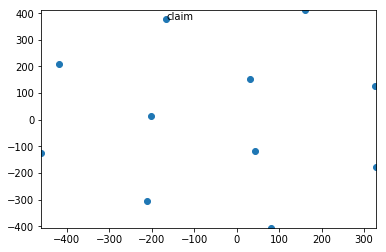

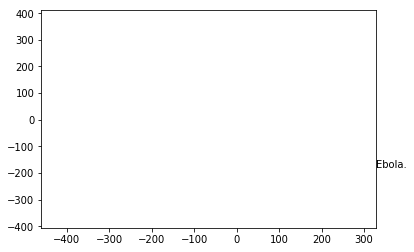

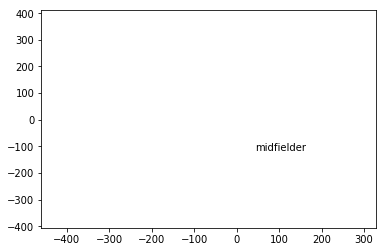

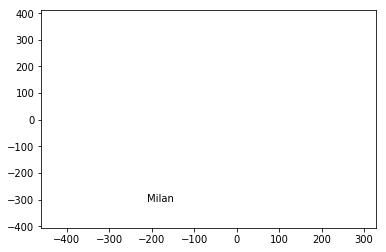

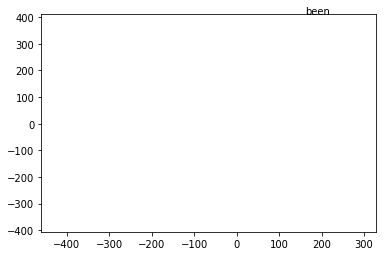

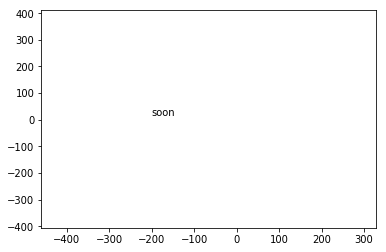

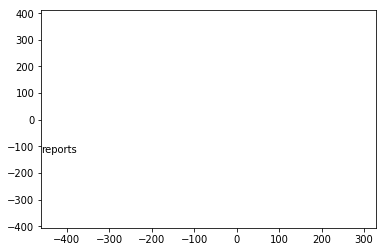

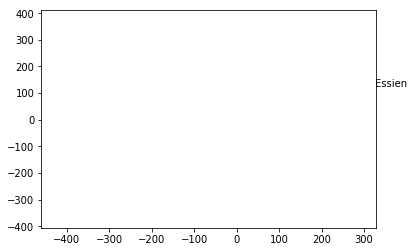

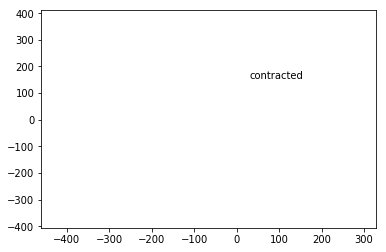

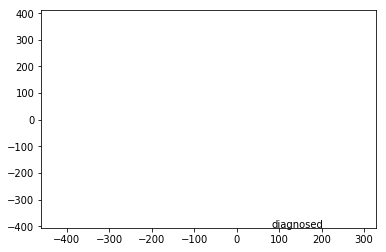

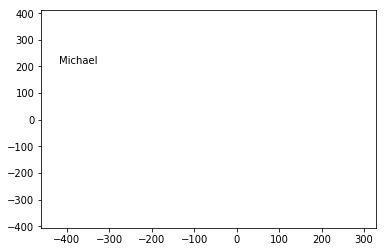

In [337]:

def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]
    close_words = model.similar_by_word(word)
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)
    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)
    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
        plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
        plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
        plt.show()
display_closestwords_tsnescatterplot(model, 'claim', 50) 


In [338]:
print(model)

Word2Vec(vocab=23, size=50, alpha=0.025)


In [339]:
words = list(model.wv.vocab)
print(words[0:5])

['Unconfirmed', 'reports', 'claim', 'that', 'Michael']


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


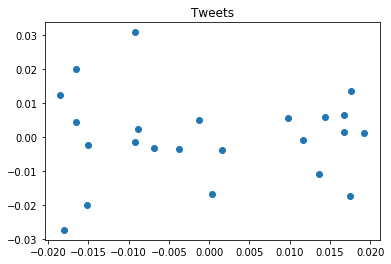

In [340]:
from sklearn.decomposition import PCA
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a plot of the projection
fig, ax = plt.subplots()
ax.plot(result[:, 0], result[:, 1], 'o')
ax.set_title('Tweets')
plt.show()

In [341]:
#Y = TSNE(X, 2, 50, 30.0)
Y = TSNE(n_components=2).fit_transform(X)

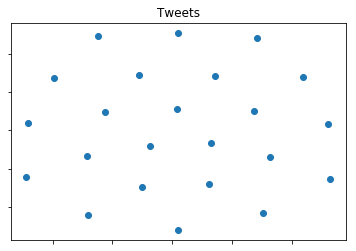

In [342]:
#Plot the t-SNE output
fig, ax = plt.subplots()
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()

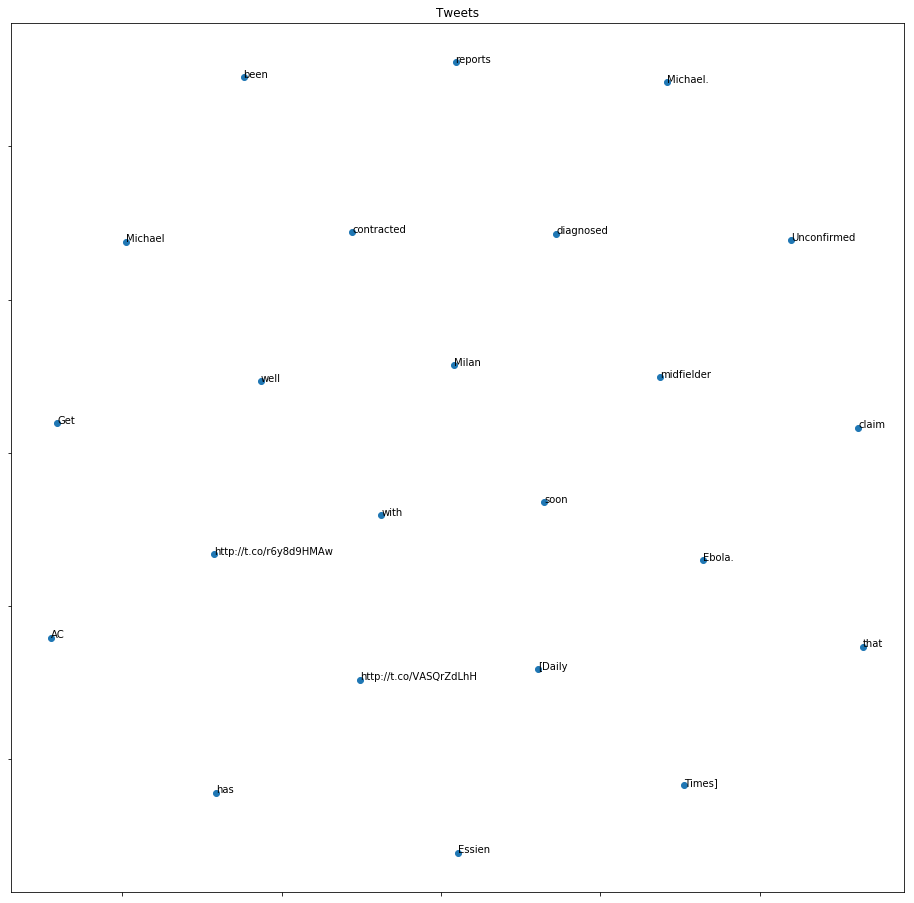

In [343]:
fig, ax = plt.subplots(figsize = (16,16))
ax.plot(Y[:, 0], Y[:, 1], 'o')
ax.set_title('Tweets')
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks

words = list(model.wv.vocab)
for i, word in enumerate(words):
	plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
plt.show()